In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

# 加载加州住房数据集（return_X_y=False 会返回包含数据、标签、描述的 Bunch 对象）
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# 添加标签列（房屋价值）
df['MedHouseVal'] = housing.target

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.isnull().sum().tolist()


[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0.5, 1.0, 'Target frequency')

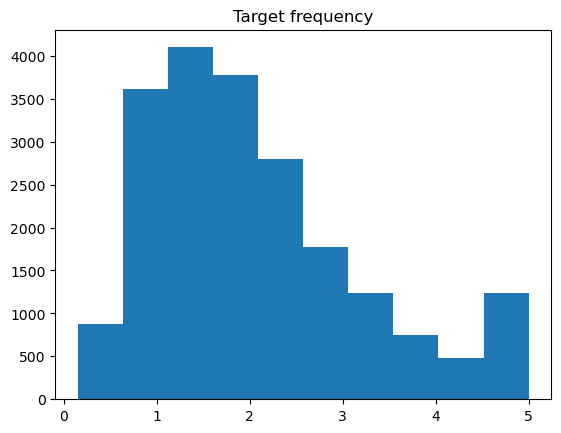

In [6]:
Target = df['MedHouseVal']
# histogram of target
import matplotlib.pyplot as plt
plt.hist(Target)
plt.title("Target frequency")

In [8]:
X = df.drop(columns=['MedHouseVal'])
import seaborn as sns


In [9]:
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler-to resolve negative numbers problem
min_max_scaler = MinMaxScaler()
X_imputed_non_negative = pd.DataFrame(
    min_max_scaler.fit_transform(X),
    columns=X.columns
)

feature = X_imputed_non_negative.columns
for col in X_imputed_non_negative.columns:
    X_imputed_non_negative[col + ' (log)'] = np.log1p(X_imputed_non_negative[col])
X_imputed2 = X_imputed_non_negative.drop(columns=feature) 
print(X_imputed2)

       MedInc (log)  HouseAge (log)  AveRooms (log)  AveBedrms (log)  \
0          0.431567        0.579034        0.042592         0.020262   
1          0.430500        0.330854        0.037512         0.018752   
2          0.382557        0.693147        0.051412         0.021703   
3          0.303579        0.693147        0.034634         0.021692   
4          0.207645        0.693147        0.037810         0.021924   
...             ...             ...             ...              ...   
20635      0.070580        0.385662        0.029334         0.023439   
20636      0.132653        0.287682        0.036664         0.028708   
20637      0.079517        0.272867        0.030436         0.023055   
20638      0.090111        0.287682        0.031288         0.024555   
20639      0.122442        0.257829        0.030774         0.024276   

       Population (log)  AveOccup (log)  Latitude (log)  Longitude (log)  
0              0.008901        0.001498        0.449470     

均方误差（MSE）： 0.40728628169670034
根均方误差（RMSE）： 0.638189847691657
平均绝对误差（MAE）： 0.4312490383628775
决定系数（R² Score）： 0.6891914749825327


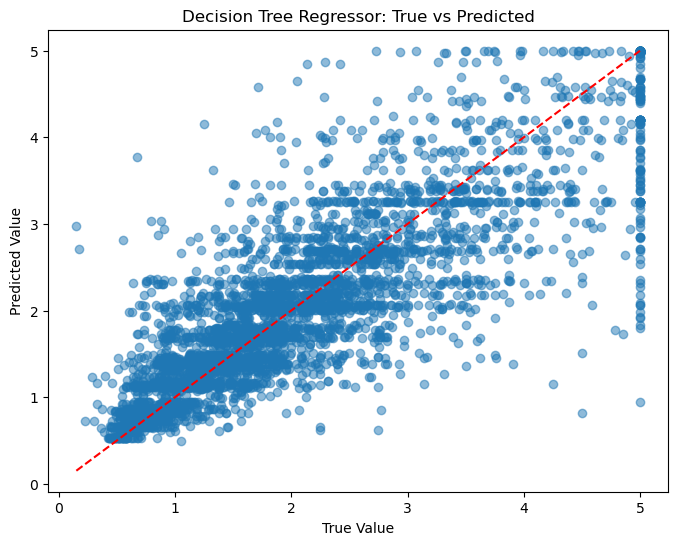

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X_imputed2, 
                                                    Target, 
                                                    test_size=0.2, 
                                                    random_state=42)


# 决策树回归器，移除分类专属参数
dt_regressor = DecisionTreeRegressor(
    max_depth=10,  # 保留树深度限制，防止单棵决策树过拟合（回归任务同样适用）
    random_state=42,  # 固定随机种子，结果可复现
    # 保留回归任务同样有效的过拟合优化参数
    min_samples_split=10,  # 节点分裂所需最小样本数，避免噪声节点分裂
    min_samples_leaf=5     # 叶节点所需最小样本数，提升模型稳健性
)

# 模型训练（fit方法调用方式与分类一致，数据为连续型标签）
dt_regressor.fit(X_train, y_train)

# 预测（predict方法调用方式一致，输出为连续型预测值）
y_pred = dt_regressor.predict(X_test)

# 回归任务核心评估指标打印
print("均方误差（MSE）：", mean_squared_error(y_test, y_pred))
print("根均方误差（RMSE）：", np.sqrt(mean_squared_error(y_test, y_pred)))  # 额外补充：RMSE更易理解（与标签同量纲）
print("平均绝对误差（MAE）：", mean_absolute_error(y_test, y_pred))
print("决定系数（R² Score）：", r2_score(y_test, y_pred))

# 可选：绘制真实值vs预测值散点图（直观展示回归效果）
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Decision Tree Regressor: True vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 完美预测参考线
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


models = {
    "线性回归": LinearRegression(),  
    "Ridge回归器": Ridge(alpha=1.0, random_state=42),  
    "随机森林回归器": RandomForestRegressor(n_estimators=100, random_state=42),  
    "梯度提升回归器": GradientBoostingRegressor(n_estimators=100, random_state=42)  
}

# 保存各模型评估结果
results = {}
print("各模型性能对比：")
print("-" * 80)


print(f"{'模型名称':<20}{'均方误差(MSE)':<20}{'根均方误差(RMSE)':<20}{'决定系数(R²)':<20}")
print("-" * 80)

for model_name, model in models.items():
    # 1. 训练模型（fit方法调用方式与分类一致，输入标签为连续型）
    model.fit(X_train, y_train)
    
    # 2. 预测（predict方法返回连续型预测值，而非离散类别）
    y_pred = model.predict(X_test)
    
    # 3. 计算回归任务核心评估指标（移除分类的accuracy、f1-score）
    mse = mean_squared_error(y_test, y_pred)  # 均方误差
    rmse = np.sqrt(mse)  # 根均方误差（与标签同量纲，更易理解）
    mae = mean_absolute_error(y_test, y_pred)  # 平均绝对误差
    r2 = r2_score(y_test, y_pred)  # 决定系数（衡量模型解释力）
    
    # 4. 保存结果（移除分类相关的y_pred可按需保留，用于后续分析）
    results[model_name] = {
        "均方误差(MSE)": mse,
        "根均方误差(RMSE)": rmse,
        "平均绝对误差(MAE)": mae,
        "决定系数(R²)": r2,
        "model": model,
        "y_pred": y_pred
    }
    
    # 5. 打印结果（保留4位小数，提升可读性）
    print(f"{model_name:<20}{mse:<20.4f}{rmse:<20.4f}{r2:<20.4f}")

# 最优模型筛选逻辑（回归任务中R²越接近1越好，MSE/RMSE越小越好，此处选用R²作为核心指标）
best_model_name = max(results.items(), key=lambda x: x[1]["决定系数(R²)"])[0]
best_model = results[best_model_name]["model"]
best_y_pred = results[best_model_name]["y_pred"]

print("-" * 80)
print(f"最优模型：{best_model_name}")
print(f"最优模型均方误差(MSE)：{results[best_model_name]['均方误差(MSE)']:.4f}")
print(f"最优模型根均方误差(RMSE)：{results[best_model_name]['根均方误差(RMSE)']:.4f}")
print(f"最优模型决定系数(R²)：{results[best_model_name]['决定系数(R²)']:.4f}")


print("\n最优模型详细回归评估指标：")
print(f"平均绝对误差(MAE)：{results[best_model_name]['平均绝对误差(MAE)']:.4f}")
print(f"解释方差得分（越接近1越好）：{r2_score(y_test, best_y_pred):.4f}")

各模型性能对比：
--------------------------------------------------------------------------------
模型名称                均方误差(MSE)           根均方误差(RMSE)         决定系数(R²)            
--------------------------------------------------------------------------------
线性回归                0.5474              0.7399              0.5823              
Ridge回归器            0.5485              0.7406              0.5814              
随机森林回归器             0.2572              0.5071              0.8038              
梯度提升回归器             0.2945              0.5427              0.7752              
--------------------------------------------------------------------------------
最优模型：随机森林回归器
最优模型均方误差(MSE)：0.2572
最优模型根均方误差(RMSE)：0.5071
最优模型决定系数(R²)：0.8038

最优模型详细回归评估指标：
平均绝对误差(MAE)：0.3280
解释方差得分（越接近1越好）：0.8038
